## Frequency analysis of the temperature time-series

1.Load AK_EML_LTER_GradientSoil_2004_2018.csv \
2.Create new dataframe with only temp.loc1_20_cm column \
3.Drop all the rows with NaNs \
4.Check the resultion of the measurement (if you see below it switches from every 2 hour to 30mins). Note: once you drop the rows make sure that shape of the array reduced \
5.Apply FFT (fast furier trasform analyze the spikes times) 

In [1]:
import numpy as np
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import quandl
import dill
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import matplotlib.pyplot as plt
from ipywidgets import interact

In [3]:
df= pd.read_csv("AK_EML_LTER_GradientSoil_2004_2018.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639943 entries, 0 to 639942
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        639943 non-null  object 
 1   site        639940 non-null  object 
 2   loc1_5cm    376472 non-null  float64
 3   loc1_10_cm  492069 non-null  float64
 4   loc1_20_cm  591699 non-null  float64
 5   loc1_30cm   591781 non-null  float64
 6   loc1_40cm   591333 non-null  float64
 7   loc2_5cm    376131 non-null  float64
 8   loc2_10cm   532834 non-null  float64
 9   loc2_20cm   582805 non-null  float64
 10  loc2_30cm   590696 non-null  float64
 11  loc2_40cm   590446 non-null  float64
 12  loc3_5cm    376465 non-null  float64
 13  loc3_10cm   540782 non-null  float64
 14  loc3_20cm   593440 non-null  float64
 15  loc3_30cm   591758 non-null  float64
 16  loc3_40cm   583357 non-null  float64
dtypes: float64(15), object(2)
memory usage: 83.0+ MB


In [5]:
df.head(3)

,date,site,loc1_5cm,loc1_10_cm,loc1_20_cm,loc1_30cm,loc1_40cm,loc2_5cm,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
0,2004-05-07 10:00:00,Extensive,NaN,2.560,0.046,-0.150,-0.304,NaN,1.922,0.080,-0.227,-0.398,NaN,NaN,NaN,-0.082,-0.244
1,2004-05-07 12:00:00,Extensive,NaN,2.434,-0.436,-0.611,-0.726,NaN,1.625,-0.350,-0.662,-0.816,NaN,NaN,NaN,-0.564,-0.692
2,2004-05-07 14:00:00,Extensive,NaN,2.502,-0.333,-0.517,-0.637,NaN,1.659,-0.218,-0.585,-0.731,NaN,NaN,NaN,-0.427,-0.581


In [6]:
#let's make a new dataset consisting with only one column of interest
temp = df[['date', 'loc1_20_cm']].copy()

In [7]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639943 entries, 0 to 639942
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        639943 non-null  object 
 1   loc1_20_cm  591699 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.8+ MB


In [8]:
# Note, we cannot drop the row untill 'date' remains as an object
temp.date = pd.to_datetime(temp.date)
temp = temp.set_index('date')

In [36]:
#temp.isna().any()
#temp = temp.drop(temp[temp.loc1_20_cm.isna()])

In [43]:
# change 'date' to index and now you drop the NaN rows 
print(temp.shape)
temp.loc1_20_cm.dropna(axis = 0, how = 'all')
temp.shape

(639943, 1)


(639943, 1)

In [10]:
temp.head()

,loc1_20_cm
date,
2004-05-07 10:00:00,0.046
2004-05-07 12:00:00,-0.436
2004-05-07 14:00:00,-0.333
2004-05-07 16:00:00,-0.697
2004-05-07 18:00:00,-0.835


In [11]:
# 2004-07-02 12:00:00 it is when they switched from 2 hour to 30 min intervals
# can you wirte a script which would automatically check for the time resolution and tell you 
# when it is disrupted or changed to another one? 
temp.iloc[673:680]

,loc1_20_cm
date,
2004-07-02 12:00:00,5.981
2004-07-02 12:30:00,5.772
2004-07-02 13:00:00,5.393
2004-07-02 13:30:00,5.740
2004-07-02 14:00:00,6.363
2004-07-02 14:30:00,6.579
2004-07-02 15:00:00,6.181


In [12]:
temp.tail()

,loc1_20_cm
date,
2018-09-30 21:30:00,0.93
2018-09-30 22:00:00,0.93
2018-09-30 22:30:00,0.91
2018-09-30 23:00:00,0.82
2018-09-30 23:30:00,0.81


<AxesSubplot:xlabel='date'>

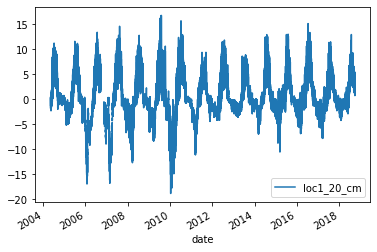

In [29]:
temp.plot()
#temp['loc1_20_cm']['2006-09-15 10:00:00':'2006-10-01 10:00:00'].plot()
#temp[:]['2017-09-30 21:30:00','2018-09-30 21:30:00'].plot();

In [26]:
temp['loc1_20_cm']['2006-09-15 10:00:00':'2006-10-01 10:00:00']

date
2006-09-15 10:00:00    4.499
2006-09-15 10:30:00    4.549
2006-09-15 11:00:00    4.643
2006-09-15 11:30:00    4.669
2006-09-15 12:00:00    4.588
                       ...  
2006-10-01 08:00:00      NaN
2006-10-01 08:30:00      NaN
2006-10-01 09:00:00      NaN
2006-10-01 09:30:00      NaN
2006-10-01 10:00:00      NaN
Name: loc1_20_cm, Length: 1538, dtype: float64

In [14]:
df.loc1_20_cm.mean()

0.5413672001812004

In [15]:
df.loc1_20_cm - df.loc1_20_cm.mean()

0        -0.495367
1        -0.977367
2        -0.874367
3        -1.238367
4        -1.376367
            ...   
639938    0.388633
639939    0.388633
639940    0.368633
639941    0.278633
639942    0.268633
Name: loc1_20_cm, Length: 639943, dtype: float64

In [16]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 639943 entries, 2004-05-07 10:00:00 to 2018-09-30 23:30:00
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   loc1_20_cm  591699 non-null  float64
dtypes: float64(1)
memory usage: 25.9 MB


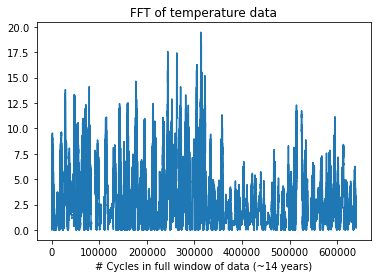

In [28]:
import scipy.fft

fft = scipy.fft.fft((temp - temp.mean()).values)
plt.plot(np.abs(fft))
plt.title("FFT of temperature data")
plt.xlabel('# Cycles in full window of data (~14 years)');

In [ ]:
plt.plot(1./365 * np.arange(len(fft)), np.abs(fft))
plt.title("FFT of temperature data (Low Frequencies zoom)")
#plt.xlim([0,10000])
plt.xlabel('Frequency ($y^{-1}$)');